# Linear Stability Analysis of the Deterministic model

Taking a closer look at the biological system, linear stability analysis is performed to grasp the mathematics behind this behaviour. The main questions that arise are:
* Why does a biological switch behave in this way?
* Specifically, why does one cell end high in concentration, whereas the other ends low in concentration?
* Lastly, can we determine the final outcome of the switch?


# Setting up Environment

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import pylab as p

In [3]:
from scipy.integrate import odeint
from google.colab import files
from matplotlib.lines import Line2D

# Define functions

In [4]:
def f(X, theta, n):
  """
  Hill function.

  Params:
  X: list of floats, concentration of cell X
  theta: float, the value of X at which f(X) = 0.5
  n: int, sensitivity of production function.

  """
  return 1/(1+pow((X/theta),n))
  
def dZ_dt(Z, ts, f, mu=1, theta=0.1, n=3): 
  """
  Ordinary differential equation system for a biological switch.

  Params:
  Z: list of floats, initial condition for cell X and Y.
  ts: list of int, time taken.
  f: func, rate of production between cells.
  mu: float, positive decay constant to describe the rate of degradation of each cell.
  theta: float, the value of X at which f(X) = 0.5.
  n: int, sensitivity of production function.
  """
  X, Y = Z[0], Z[1]
  dxdt, dydt = -mu*X + f(Y,theta,n), -mu*Y + f(X,theta,n)
  return [dxdt, dydt]

# Plotting phase portraits

A phase portrait of the deterministic model is plotted to understand the stability of the system.

The model we use is where theta=0.3, mu=1, n=3.

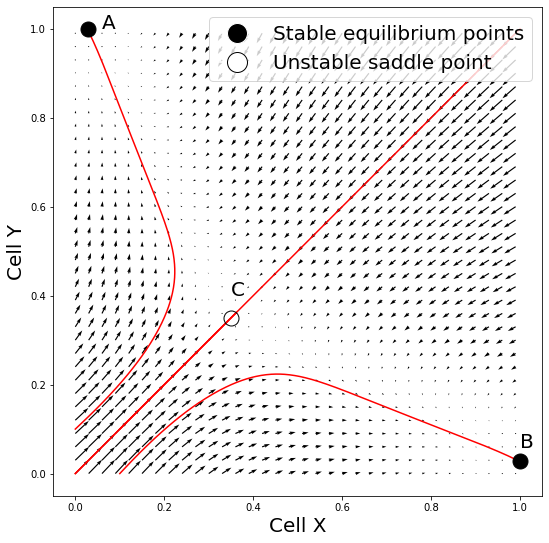

In [12]:
# Set time range
ts = np.linspace(0, 10, 1000)

# Vary Cell X and Y concentration from 0 to 1
xs = np.arange(0, 1, 0.03)
ys = np.arange(0, 1, 0.03) 

# Set initial conditions
y = 0.5
initial_theta=0.3

# Using quiver to create phase portrait
X, Y = np.meshgrid(xs, ys)
u, v = dZ_dt([X,Y], ts, f, mu=1,theta = initial_theta, n=3)
X,Y = np.meshgrid(xs,ys)

fig, ax = plt.subplots(figsize=(9,9))
ax.quiver(X,Y,u,v)
ax.set_aspect('equal')

nseries = 2;  
ts = np.linspace(0, 10, 1000)
xs = np.linspace(0, 0.1, nseries)
ys = np.linspace(0, 0.1, nseries) 

for x in range(nseries):
  for y in range(nseries):
    Xs = odeint(dZ_dt, (xs[x], ys[y]), ts,args=(f,1,initial_theta))
    if (Xs[:,0].any() == 0):
      plt.plot(Xs[:,0],Xs[:,1],'+', color = 'red')
    else:
      plt.plot(Xs[:,0], Xs[:,1], color='red');
plt.xlabel("Cell X",fontsize=20); plt.ylabel("Cell Y",fontsize=20);

# Plot phase portrait trajectories
xs = np.linspace(0, 1, nseries)
ys = np.linspace(0, 1, nseries) 
plt.plot(xs,ys, color = 'red')

# Plot equilibrium points
ax.plot([0.0285],[0.999], marker="o", color = 'black', markersize=15) 
ax.plot([0.999],[0.0285], marker="o", color = 'black', markersize=15)
ax.plot([0.35],[0.35], marker="o", color='black', markersize=15, mfc='none') #saddle point

line1 = Line2D(range(1), range(1), color="w", marker='o', markerfacecolor="black", markersize=10)
line2 = Line2D(range(1), range(1), color="w", marker='o',markeredgecolor='black',markersize=10)

# Label equilibrium points
plt.annotate('A', (0.06, 1),fontsize=20)
plt.annotate('B', (1,0.06),fontsize=20)
plt.annotate('C',(0.35,0.4),fontsize=20)
plt.legend((line1,line2),('Stable equilibrium points','Unstable saddle point'),numpoints=1, loc=1,prop={"size":20},markerscale=2)
plt.show()

**Another phase portrait:** *theta=0.5*, mu=1, n=3.

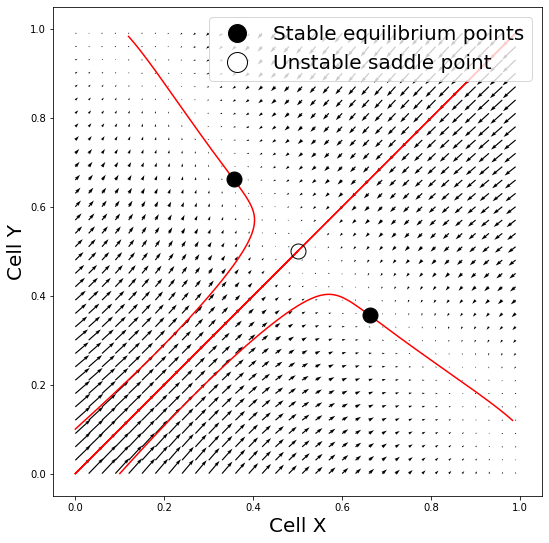

In [14]:
# Set time range
ts = np.linspace(0, 10, 1000)

# Vary Cell X and Y concentration from 0 to 1
xs = np.arange(0, 1, 0.03)
ys = np.arange(0, 1, 0.03) 

# Set initial conditions
y = 0.5
initial_theta=0.5

# Using quiver to create phase portrait
X, Y = np.meshgrid(xs, ys)
u, v = dZ_dt([X,Y], ts, f, mu=1,theta = initial_theta, n=3)
X,Y = np.meshgrid(xs,ys)

fig, ax = plt.subplots(figsize=(9,9))
ax.quiver(X,Y,u,v)
ax.set_aspect('equal')

nseries = 2;  
ts = np.linspace(0, 10, 1000)
xs = np.linspace(0, 0.1, nseries)
ys = np.linspace(0, 0.1, nseries) 

for x in range(nseries):
  for y in range(nseries):
    Xs = odeint(dZ_dt, (xs[x], ys[y]), ts,args=(f,1,initial_theta))
    if (Xs[:,0].any() == 0):
      plt.plot(Xs[:,0],Xs[:,1],'+', color = 'red')
    else:
      plt.plot(Xs[:,0], Xs[:,1], color='red');
plt.xlabel("Cell X",fontsize=20); plt.ylabel("Cell Y",fontsize=20);

# Plot phase portrait trajectories
xs = np.linspace(0, 1, nseries)
ys = np.linspace(0, 1, nseries) 
plt.plot(xs,ys, color = 'red')

xs = np.linspace(0, 1, nseries)
ys = np.linspace(0, 1, nseries) 
plt.plot(xs,ys, color = 'red')

ax.plot([0.3572],[0.6618], marker="o", color = 'black', markersize=15) 
ax.plot([0.6618],[0.3572], marker="o", color = 'black', markersize=15)
ax.plot([0.5],[0.5], marker="o", color='black', markersize=15, mfc='none') #saddle point

line1 = Line2D(range(1), range(1), color="w", marker='o', markerfacecolor="black", markersize=10)
line2 = Line2D(range(1), range(1), color="w", marker='o',markeredgecolor='black',markersize=10)
plt.legend((line1,line2),('Stable equilibrium points','Unstable saddle point'),numpoints=1, loc=1,prop={"size":20},markerscale=2)

plt.show()